In [2]:
import torch
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

We download the data in the same way we did when using ````sklearn```` library.

Note that here we also chagne the **data type** to ````torch.tensor````, because we want to use functions from the ````pytorch```` library.

In [3]:
from sklearn import datasets
digits = datasets.load_digits()
img = digits.images
labels = digits.target

X = img.reshape((len(img),-1))
from sklearn.model_selection import train_test_split
test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size = test_size, shuffle=False)

X_train = X_train.astype(np.float32)
X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)
y_train = torch.tensor(y_train)
y_train=y_train.long()
MLPClassifiery_test = torch.tensor(y_test)

### Q1 

Let's build a ````Network```` class. This will be your model.

You will need
* ````__init__```` function defining the attributes. These attributes should be the different layers of your model.
* You can define a linear (fully-connected) layer using ````Linear(input_size,output_size)```` function from "torch.nn" library (imported as "nn")
* You can define an activation function using ````ReLU()```` function, also from "torch.nn" library
* ````forward```` function, defining how the input is processed in the forward pass, layer by layer.

In [4]:
class Network(nn.Module):
    def __init__(self,input_size,output_size):
        super(Network, self).__init__()
        linear_layer = nn.Linear(input_size,output_size)
    
        self.relu=nn.ReLU()
    def activation(self, x):
        return self.relu(self.linear_layer(x))

### Q2
Define your model as instance of your Network class.

In [5]:
model = Network(32,16)

Below we define the optimized and loss function.

*For now you can just use this as it is. As you learn more about Machine Learning, you might want to experiment with changing different parameters in this setup, or even picking a different loss function and a better optimizer.*

*It takes a lot of experience to learn all bits and pieces of this machinery, and all programmers spend a long time just copy+paste-ing this default setup to their code.*

*The rule of thumb is: if it works well, let's use it and see what happens!*

In [8]:
learning_rate =0.001
epochs = 200
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
loss_func = nn.CrossEntropyLoss()

ValueError: optimizer got an empty parameter list

### Q3
Model training.

You will train your model in a loop. Loop should be over epochs ("training epochs"). We will do this step by step.

In [9]:
loss_list=[]
for e in range(epochs):
    
    ## first, at the beginning of the loop, make sure that the optimizer kills all previous grad values to avoid using them again in your new iteration
    optimizer.zero_grad()
    
    # now, perform the forward step by applying your model to your dataset
    output = model.forward(X_train)
    
    # calculate the loss, using the "loss_func" applied to the output from your model compared with the real labels
    loss=loss_func(output,y_train)
    l=float('{:.6f}'.format(loss))
    loss_list.append(l)
    
    # MAGIC time: perform the back-prop:
    loss.backward()
    optimizer.step()
    
    # at each step, let's print the value of the loss to see if it is changing.
    print('Epoch: {} - Loss: {:.6f}'.format(e, loss))

NameError: name 'optimizer' is not defined

### Q4
Modify your code so that
* It only prints the value of the loss every 10 steps
* saves down values of loss and values of accuracy at each epoch (each step)

Then, plot on separate graphs 
* the accuracy as function of epochs
* the loss as function of epochs

Is the model training well?

In [10]:
loss_list=[]
for e in range(epochs):
    
    ## first, at the beginning of the loop, make sure that the optimizer kills all previous grad values to avoid using them again in your new iteration
    optimizer.zero_grad()
    
    # now, perform the forward step by applying your model to your dataset
    output = model.forward(X_train)
    
    # calculate the loss, using the "loss_func" applied to the output from your model compared with the real labels
    loss=loss_func(output,y_train)
    l=float('{:.6f}'.format(loss))
    loss_list.append(l)
    
    # MAGIC time: perform the back-prop:
    loss.backward()
    optimizer.step()
    
    # at each step, let's print the value of the loss to see if it is changing.
    if e%10==0:
        print('Epoch: {} - Loss: {:.6f}'.format(e, loss))

NameError: name 'optimizer' is not defined

ValueError: x and y must have same first dimension, but have shapes (50,) and (0,)

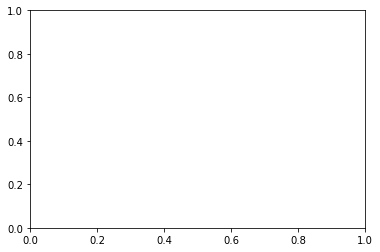

In [12]:
x=np.linspace(0,200)
plt.plot(x,loss_list)